Import relevant libraries

In [546]:
import csv
import datetime
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Read CSV file with stock data

In [547]:
def get_csv_file(fname):
    csv_file = open(fname, 'r', encoding='cp1252')
    try:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_headers = next(csv_reader)
    except:
        csv_reader = None
        csv_headers = None
    if csv_headers is None or csv_reader is None:
        raise IOError("Couldn't read CSV file")
    return csv_headers, csv_reader

Determine what the most common day of the week for a breach notification to be issues is.

In [548]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")

days_of_week_index = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df = pd.DataFrame({"Day of Week": days_of_week_index, "Public Breach": [0, 0, 0, 0, 0, 0, 0], "Private Breach": [0, 0, 0, 0, 0, 0, 0] })

# Iterate through all publication dates
for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the day of week (0-6 value)
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    
    if is_public == "TRUE":
        df.loc[pub_date.weekday(), "Public Breach"] += 1
    else:
        df.loc[pub_date.weekday(), "Private Breach"] += 1
print(df)

  Day of Week  Public Breach  Private Breach
0      Monday             95             462
1     Tuesday             74             499
2   Wednesday             83             493
3    Thursday             87             515
4      Friday            100             577
5    Saturday             24             188
6      Sunday             19             139


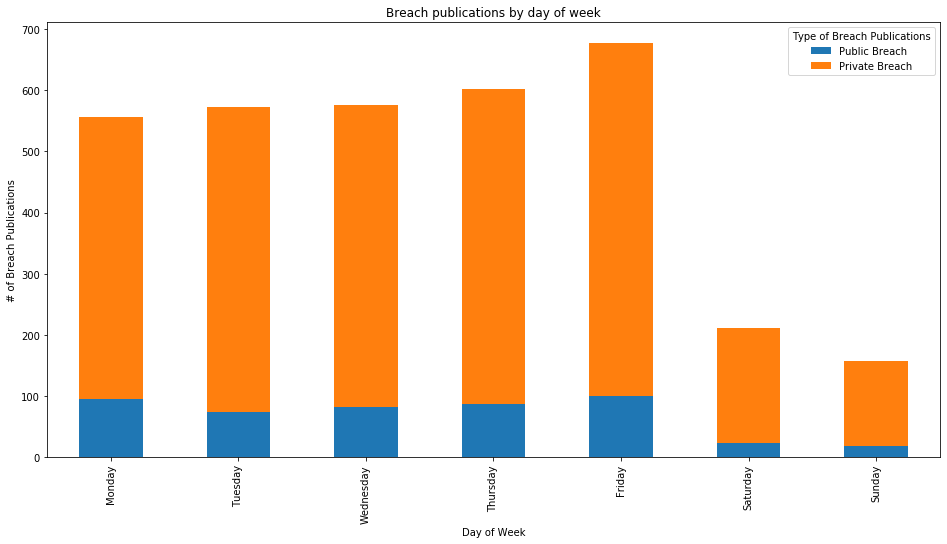

In [549]:
# Change the output image size
#plt.rcParams['figure.figsize'] = [10, 5]
# Generate our bar graph
#ax = df.plot.bar(x='Day of Week', y='# of Breach Publications', rot=0)
#plt.ylabel('# of Breach Publications')
#plt.title('Public Company Breach Publications by Day of the Week')
df.loc[:,df.columns].plot.bar(x="Day of Week", stacked=True, figsize=(16,8))
plt.ylabel('# of Breach Publications')
plt.xlabel('Day of Week')
plt.legend(title="Type of Breach Publications")
plt.title('Breach publications by day of week')
plt.savefig('images/breach-publications-by-day-of-week.png', bbox_inches='tight', dpi=300)

In [550]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")

# use a set to only identify each element once
years = set()

# Get the number of years
for breach in csv_reader:
    pub_date = breach[pub_index]
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the day of week (0-6 value)
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    years.add(pub_date.year)

# sort our years
years = list(years)
years.sort()

days_of_week_index = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']


breach_numbers_dict = {}
for year in years:
    breach_numbers_dict[year] = [0, 0, 0, 0, 0, 0, 0]
    
# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the day of week (0-6 value)
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    
    if is_public == "TRUE":
        breach_numbers_dict[pub_date.year][pub_date.weekday()] += 1

breach_years = []
breach_days_of_week = []
breach_numbers = []
# Flatten our dict into the forms needed
for year, year_data in breach_numbers_dict.items():
    for day_of_week in range(0,len(year_data)):
        breach_years.append(year)
        breach_days_of_week.append(days_of_week_index[day_of_week])
        breach_numbers.append(year_data[day_of_week])

rows = zip(breach_years, breach_days_of_week, breach_numbers)
headers = ['Year', 'Day Of Week', '# of Breach Notifications']
df = pd.DataFrame(rows, columns=headers)
pivot_df = df.pivot(index='Year', columns='Day Of Week', values='# of Breach Notifications')
print(pivot_df)




Day Of Week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Year                                                                       
2001              0       0         0       0         0        0          0
2002              0       0         0       0         0        0          0
2003              0       0         0       0         0        0          0
2004              0       0         0       0         0        0          1
2005              1       0         0       1         1        0          1
2006              0       1         0       1         2        0          0
2007              3       3         1       0         0        2          3
2008              2       3         1       0         2        3          2
2009              3       1         0       0         2        3          1
2010              3       1         0       0         1        0          2
2011              4       2         2       2         4        0          2
2012        

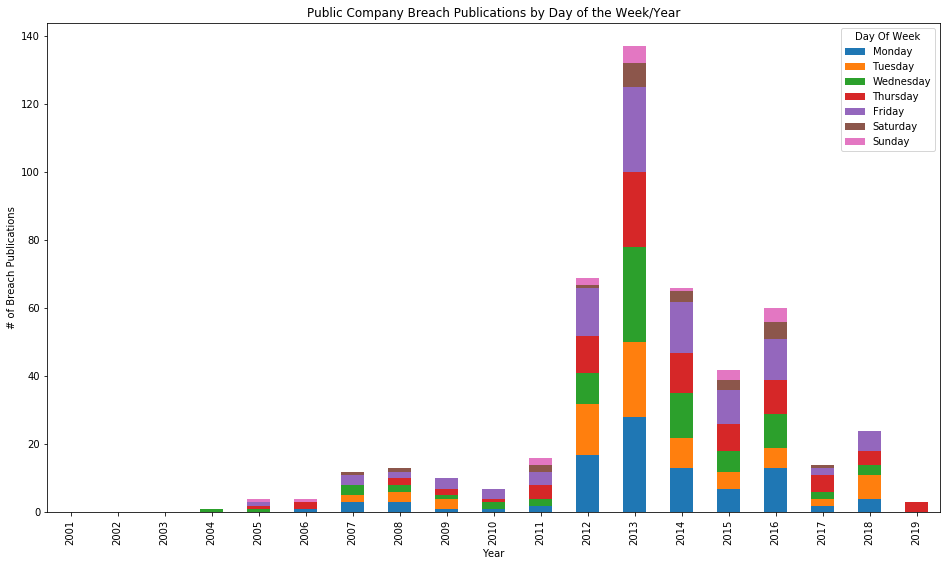

In [551]:
pivot_df.loc[:,days_of_week_index].plot.bar(stacked=True, figsize=(16,9))
plt.ylabel('# of Breach Publications')
plt.title('Public Company Breach Publications by Day of the Week/Year')
plt.savefig('images/public-breaches-by-year-and-day-of-week.png', bbox_inches='tight', dpi=300)

Total Number of Breaches per Year

In [552]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
public_year_index = csv_headers.index("Year")
in_scope_index = csv_headers.index("In_Scope")

breaches_by_year = {}

# use a set to only identify each element once
years = set()

# Get the number of years
for breach in csv_reader:
    pub_date = breach[pub_index]
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the year
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    years.add(str(pub_date.year))

# sort our years
years = list(years)
years.sort()

# prepoulate our dicts
for year in years:
    breaches_by_year[year] = [0,0]
    
# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    public_year = breach[public_year_index]
    is_in_scope = breach[in_scope_index]
    if is_public == "TRUE" and pub_date is not "":
        pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
        if is_in_scope == "TRUE":
            breaches_by_year[str(pub_date.year)][0] += 1
        else:
            # convert the date to a datetime and then get the year
            breaches_by_year[str(pub_date.year)][1] += 1
        
# convert into the format needed for dataframe
breach_datapoint = []
# Flatten our dict into the forms needed
for year, size_data in breaches_by_year.items():
    breach_datapoint.append([year] + size_data)

headers = ['Year', "In Scope", "Out of Scope"]
df = pd.DataFrame(breach_datapoint, columns=headers)
print(df)
print(df.sum())
    
#breaches_by_year = pd.DataFrame(breaches_by_year.items(), columns=['Year', '# of Breaches'])
    
#print(breaches_by_year)

    Year  In Scope  Out of Scope
0   2001         0             0
1   2002         0             0
2   2003         0             0
3   2004         1             0
4   2005         4             0
5   2006         3             1
6   2007         8             4
7   2008        10             3
8   2009         4             6
9   2010         3             4
10  2011         8             8
11  2012        25            44
12  2013        30           107
13  2014        20            46
14  2015         9            33
15  2016         9            51
16  2017         6             8
17  2018        11            13
18  2019         1             2
Year            2.001200e+75
In Scope        1.520000e+02
Out of Scope    3.300000e+02
dtype: float64


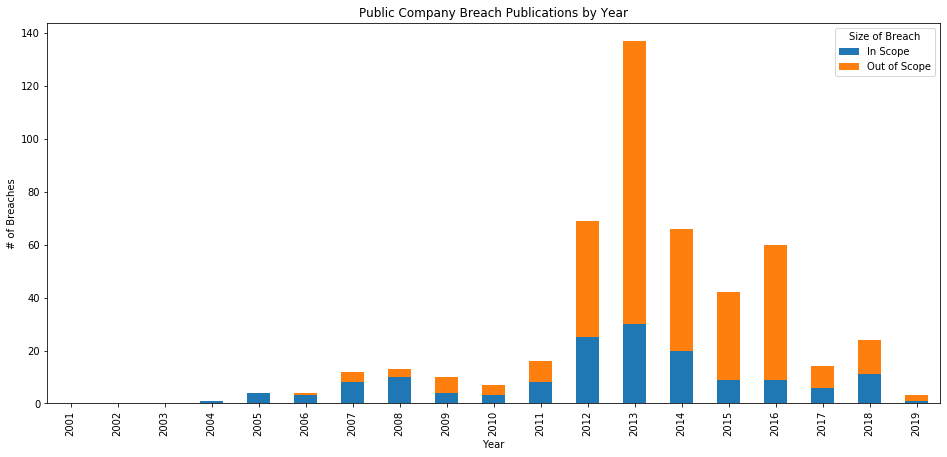

In [553]:



df.loc[:,headers].plot.bar(x="Year", stacked=True, figsize=(16,7))
plt.ylabel('# of Breaches')
plt.xlabel('Year')
plt.legend(title="Size of Breach")
plt.title('Public Company Breach Publications by Year')
plt.savefig('images/public-breaches-in-versus-out-of-scope.png', bbox_inches='tight', dpi=300)

Total Number of Breaches per Year over Public Breaches

In [554]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
public_year_index = csv_headers.index("Year")
in_scope_index = csv_headers.index("In_Scope")



public_breaches_by_year = {}
total_breaches_by_year = {}

# use a set to only identify each element once
years = set()

# Get the number of years
for breach in csv_reader:
    pub_date = breach[pub_index]
    # skip entries without pubdatyes
    if pub_date is '':
        continue
    # convert the date to a datetime and then get the year
    pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
    years.add(str(pub_date.year))

# sort our years
years = list(years)
years.sort()

# prepoulate our dicts
for year in years:
    public_breaches_by_year[year] = 0
    total_breaches_by_year[year] = 0

# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    public_year = breach[public_year_index]
    is_in_scope = breach[in_scope_index]
    
    if is_public == "TRUE" and pub_date is not "" and is_in_scope == "TRUE":
        # convert the date to a datetime and then get the year
        pub_date = datetime.datetime.strptime(pub_date, "%m/%d/%y")
        public_breaches_by_year[str(pub_date.year)] += 1
        total_breaches_by_year[str(pub_date.year)] += 1
    else:
        total_breaches_by_year[public_year] += 1

total_breaches_by_year = pd.DataFrame(total_breaches_by_year.items(), columns=['Year', '# of Breaches'])
public_breaches_by_year = pd.DataFrame(public_breaches_by_year.items(), columns=['Year', '# of Breaches'])

print(total_breaches_by_year)
print(public_breaches_by_year)

    Year  # of Breaches
0   2001              1
1   2002              0
2   2003              2
3   2004              5
4   2005             10
5   2006             12
6   2007             27
7   2008             44
8   2009             30
9   2010             43
10  2011            142
11  2012            527
12  2013            964
13  2014            455
14  2015            424
15  2016            473
16  2017             57
17  2018            118
18  2019             21
    Year  # of Breaches
0   2001              0
1   2002              0
2   2003              0
3   2004              1
4   2005              4
5   2006              3
6   2007              8
7   2008             10
8   2009              4
9   2010              3
10  2011              8
11  2012             25
12  2013             30
13  2014             20
14  2015              9
15  2016              9
16  2017              6
17  2018             11
18  2019              1


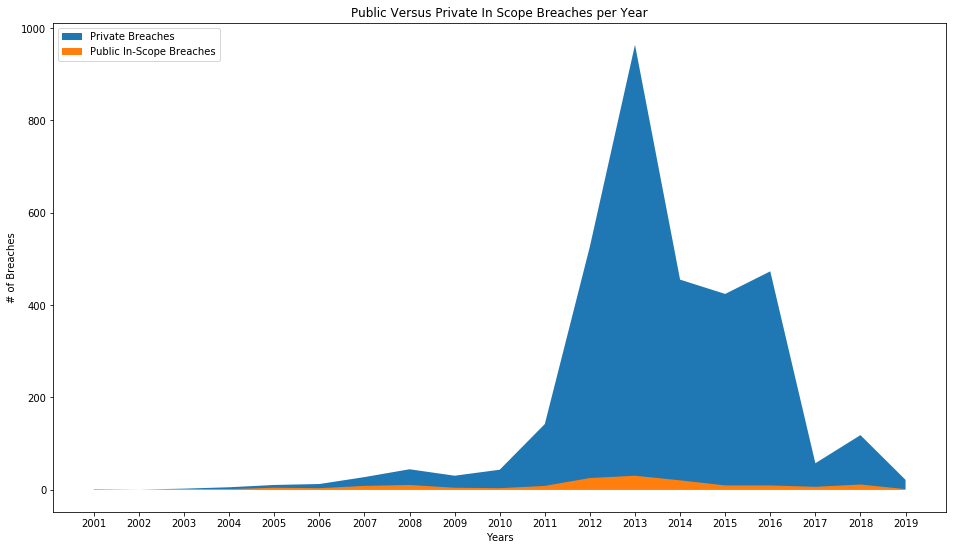

In [555]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.fill_between(total_breaches_by_year["Year"], 0, total_breaches_by_year["# of Breaches"], label='Private Breaches')
ax1.legend(loc="upper left")
ax1.fill_between(public_breaches_by_year["Year"], 0, public_breaches_by_year["# of Breaches"], label='Public In-Scope Breaches')
ax1.legend(loc="upper left")
plt.xlabel('Years')
plt.ylabel('# of Breaches')
plt.title('Public Versus Private In Scope Breaches per Year')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-versus-private-per-year.png')

Breaches by Industry

In [556]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
industry_index = csv_headers.index("Industry2")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

# use a set to only identify each element once
industries = set()

# Get the number of years
for breach in csv_reader:
    if breach[industry_index] != "":
        industries.add(breach[industry_index].capitalize())

# Convert set to list for sorting
industries = list(industries)
industries.sort()

breach_numbers_dict = {}
for industry in industries:
    breach_numbers_dict[industry] = 0

# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")


for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    
    if is_public == "TRUE" and pub_date is not "" and is_in_scope == "TRUE":
        breach_numbers_dict[breach[industry_index].capitalize()] += 1

industry_datapoint = []
# Flatten our dict into the forms needed
for industry, industry_data in breach_numbers_dict.items():
    industry_datapoint.append([industry, industry_data])

headers = ['Industry', 'Public Breaches']
df = pd.DataFrame(industry_datapoint, columns=headers)
print(df)

         Industry  Public Breaches
0      Consulting                4
1       Education                1
2         Finance               41
3            Food                9
4      Healthcare               27
5   Manufacturing                6
6           Media                5
7          Retail               11
8        Services                3
9            Tech               41
10         Travel                4


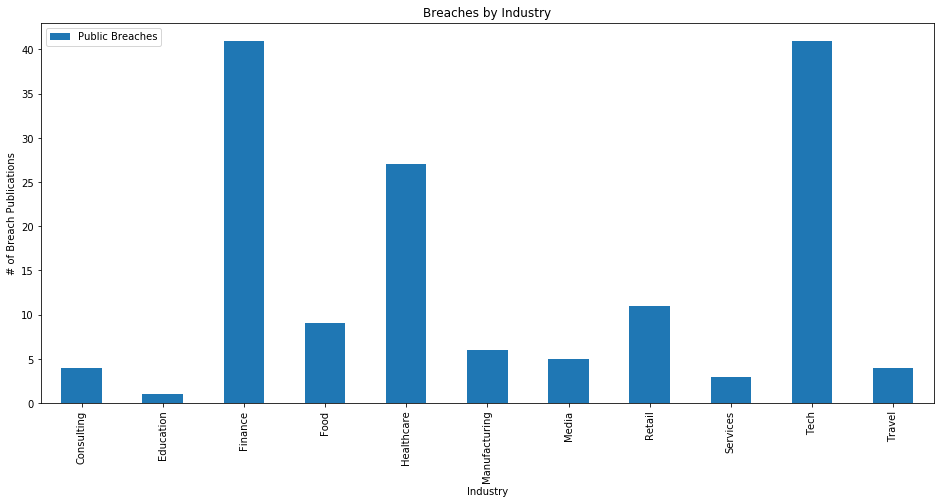

In [557]:
df.loc[:,headers].plot.bar(x="Industry", stacked=True, figsize=(16,7))
plt.ylabel('# of Breach Publications')
#plt.xlabel('Industry')
plt.title('Breaches by Industry')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-industry.png', bbox_inches='tight', dpi=300)


Size of Breaches

In [558]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
size_index = csv_headers.index("Size")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

size_categories = { "unknown": [0], "<100K": [0], "<1,000,000": [0], "<100,000,000": [0], "<500,000,000": [0], ">500,000,000": [0]}

for breach in csv_reader:
    size = breach[size_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_public = False
    pub_date = breach[pub_index]
    public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    if is_in_scope == "TRUE" and pub_date is not "":
        is_public = True
    try:
        size = int(size.replace(',', ''))
    except ValueError:
        if is_public:
            size_categories["unknown"][0] +=1
            continue
        else:
            continue
    if size < 100000:
        if is_public:
            size_categories["<100K"][0] +=1
    elif size >= 100000 and size < 1000000 :
        if is_public:
            size_categories["<1,000,000"][0] +=1
    elif size >= 1000000 and size < 100000000 :
        if is_public:
            size_categories["<100,000,000"][0] +=1
    elif size >= 100000000 and size < 500000000 :
        if is_public:
            size_categories["<500,000,000"][0] +=1
    else:
        if is_public:
            size_categories[">500,000,000"][0] +=1

# convert into the format needed for dataframe
size_datapoint = []
# Flatten our dict into the forms needed
for size, size_data in size_categories.items():
    size_datapoint.append([size, size_data[0]])

headers = ['Size', 'Public Breaches']
df = pd.DataFrame(size_datapoint, columns=headers)
print(df)

           Size  Public Breaches
0       unknown               13
1         <100K               64
2    <1,000,000               33
3  <100,000,000               37
4  <500,000,000                4
5  >500,000,000                1


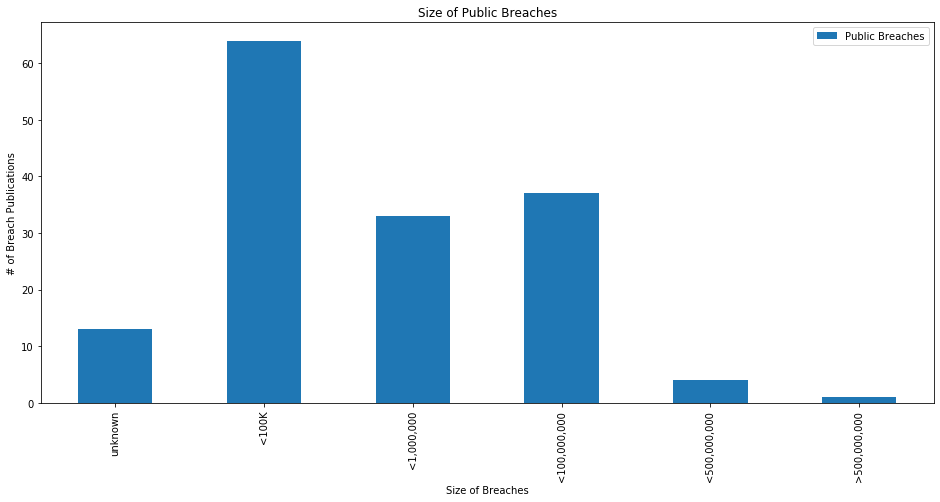

In [559]:
df.loc[:,headers].plot.bar(x="Size", stacked=False, figsize=(16,7))
plt.ylabel('# of Breach Publications')
plt.xlabel('Size of Breaches')
plt.title('Size of Public Breaches')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-size.png', bbox_inches='tight', dpi=300)

Size of databreach by industry

In [560]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
industry_index = csv_headers.index("Industry2")
size_index = csv_headers.index("Size")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

# Get list of industries
# use a set to only identify each element once
industries = set()

# Get the number of years
for breach in csv_reader:
    is_in_scope = breach[in_scope_index]
    if is_in_scope != "TRUE":
        continue
        
    industries.add(breach[industry_index])

# Convert set to list for sorting
industries = list(industries)
industries.sort()

industry_default = ([0] * len(industries))

industry_catagories = {}
for industry in industries:
    industry_catagories[industry] = [0,0,0,0,0,0]

# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    size = breach[size_index]
    industry = breach[industry_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    
    if is_in_scope != "TRUE":
        continue
        
    # I still find this approach ugly
    try:
        size = int(size.replace(',', ''))
    except ValueError:
        industry_catagories[industry][0] +=1
        continue
        
    # Get index of industry into industries list
    industry_lookup_index = industries.index(industry)
    if size < 100000:
        industry_catagories[industry][1] +=1
    elif size >= 100000 and size < 1000000 :
        industry_catagories[industry][2] +=1
    elif size >= 1000000 and size < 100000000 :
        industry_catagories[industry][3] +=1
    elif size >= 100000000 and size < 500000000 :
        industry_catagories[industry][4] +=1
    else:
        industry_catagories[industry][5] +=1
        
# convert into the format needed for dataframe
industry_datapoint = []
# Flatten our dict into the forms needed
for industry, size_data in industry_catagories.items():
    industry_datapoint.append([industry] + size_data)

headers = ['Industry', "Unknown", "<100K", "<1,000,000", "<100,000,000", "<500,000,000", ">500,000,000",  ]
df = pd.DataFrame(industry_datapoint, columns=headers)
print(df)

         Industry  Unknown  <100K  <1,000,000  <100,000,000  <500,000,000  \
0      consulting        1      3           0             0             0   
1       education        0      1           0             0             0   
2         finance        2     17          11            10             1   
3            food        2      6           1             0             0   
4      healthcare        2     18           4             3             0   
5   manufacturing        0      3           1             2             0   
6           media        0      2           0             3             0   
7          retail        2      1           2             5             1   
8        services        0      3           0             0             0   
9            tech        4      9          12            14             2   
10         travel        0      1           2             0             0   

    >500,000,000  
0              0  
1              0  
2              0  

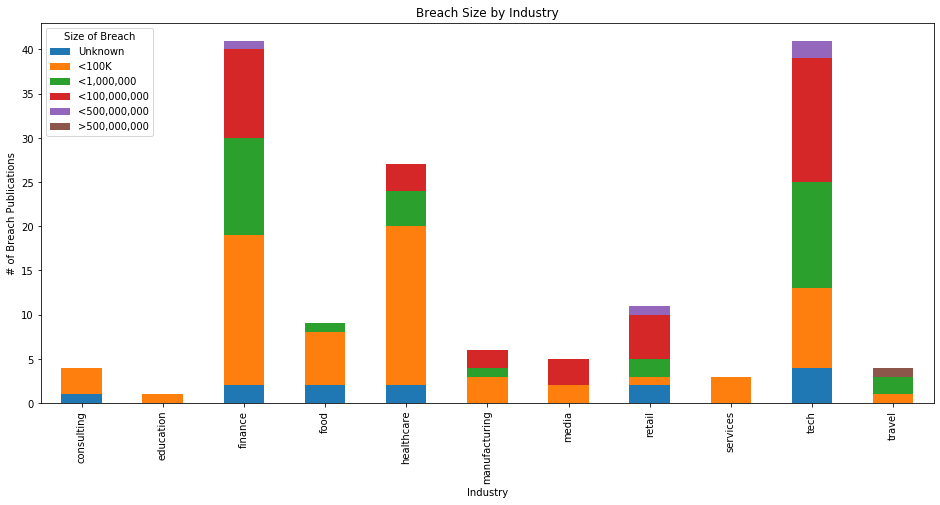

In [561]:
df.loc[:,headers].plot.bar(x="Industry", stacked=True, figsize=(16,7))
plt.ylabel('# of Breach Publications')
plt.xlabel('Industry')
plt.legend(title="Size of Breach")
plt.title('Breach Size by Industry')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-size-and-industry.png', bbox_inches='tight', dpi=300)

Breach Size by Year (Public Only)

In [562]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
year_index = csv_headers.index("Year")
size_index = csv_headers.index("Size")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

# use a set to only identify each element once
years = set()

# Get the number of years
for breach in csv_reader:
    year = breach[year_index]
    years.add(str(year))

# sort our years
years = list(years)
years.sort()

year_catagories = {}
year_totals = {}

for year in years:
    year_catagories[year] = [0,0,0,0,0,0]
    year_totals[year] = 0
    
# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    size = breach[size_index]
    year = breach[year_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    
    if is_in_scope != "TRUE":
        continue

    # I still find this approach ugly
    try:
        size = int(size.replace(',', ''))
    except ValueError:
        year_catagories[year][0] +=1
        continue

    if size < 100000:
        year_catagories[year][1] +=1
        year_totals[year] += size
    elif size >= 100000 and size < 1000000:
        year_catagories[year][2] +=1
        year_totals[year] += size
    elif size >= 1000000 and size < 100000000:
        year_catagories[year][3] +=1
        year_totals[year] += size
    elif size >= 100000000 and size < 500000000:
        year_catagories[year][4] +=1
        year_totals[year] += size
    else:
        year_catagories[year][5] +=1
        year_totals[year] += size
print(count)   
# convert into the format needed for dataframe
year_datapoint = []
# Flatten our dict into the forms needed
for year, size_data in year_catagories.items():
    year_datapoint.append([year] + size_data)

headers = ['Year', "Unknown", "<100K", "<1,000,000", "<100,000,000", "<500,000,000", ">500,000,000" ]
df = pd.DataFrame(year_datapoint, columns=headers)
print(df)
year_totals_df = pd.DataFrame(list(year_totals.items()), columns=['Years', 'Total Breaches'])
print(year_totals_df)

152
    Year  Unknown  <100K  <1,000,000  <100,000,000  <500,000,000  >500,000,000
0   2001        0      0           0             0             0             0
1   2003        0      0           0             1             0             0
2   2004        0      0           0             0             0             0
3   2005        0      0           3             3             0             0
4   2006        0      0           2             1             0             0
5   2007        0      5           1             2             0             0
6   2008        0      3           2             3             0             0
7   2009        0      2           1             0             0             0
8   2010        0      1           2             1             0             0
9   2011        1      5           3             4             0             0
10  2012        4     12           5             4             0             0
11  2013        2     17           4            

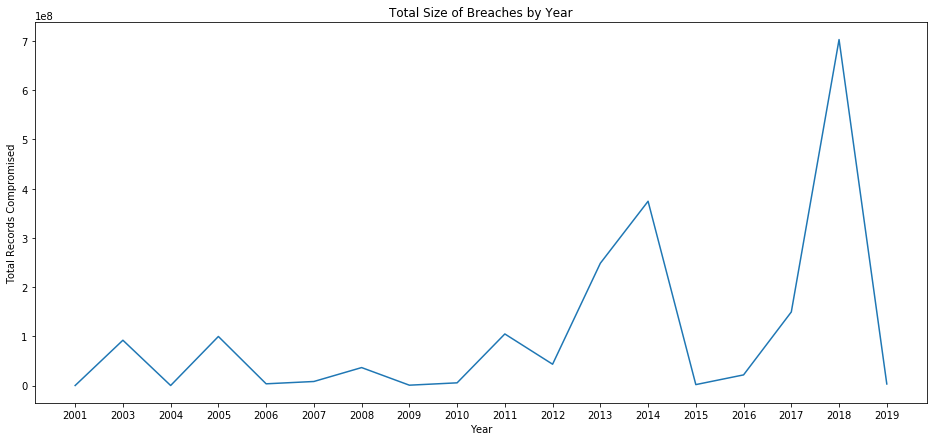

In [563]:

plt.rcParams['figure.figsize'] = [16, 7]
plt.ylabel('Total Records Compromised')
plt.xlabel('Year')
plt.title('Total Size of Breaches by Year')
dates = list(year_totals.keys())           # list() needed for python 3.x
prices = list(year_totals.values())        # ditto
plt.plot_date(dates, prices, '-') # this will show date at the x-axis
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/total-size-of-breaches-by-year.png', bbox_inches='tight', dpi=300)


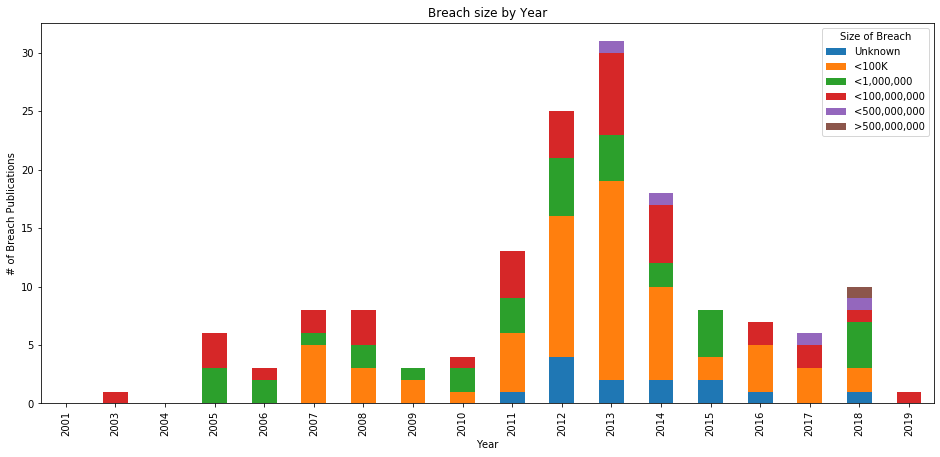

In [564]:
df.loc[:,headers].plot.bar(x="Year", stacked=True, figsize=(16,7))
plt.ylabel('# of Breach Publications')
plt.xlabel('Year')
plt.legend(title="Size of Breach")
plt.title('Breach size by Year')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-size-and-year.png', bbox_inches='tight', dpi=300)

Breach by Style

In [565]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
style_index = csv_headers.index("Style")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

# use a set to only identify each element once
styles = set()

# Get the number of years
for breach in csv_reader:
    is_in_scope = breach[in_scope_index]
    
    if is_in_scope != "TRUE":
        continue
    style = breach[style_index]
    styles.add(str(style))

# sort our years
style = list(style)
style.sort()

style_catagories = {}
for style in styles:
    style_catagories[style] = 0

# Reset our csv seek so we can reread
csv_headers, csv_reader = get_csv_file("dataset.csv")

for breach in csv_reader:
    is_in_scope = breach[in_scope_index]
    
    if is_in_scope != "TRUE":
        continue

    style = breach[style_index]
    style_catagories[style] +=1
        
breaches_by_style = pd.DataFrame(style_catagories.items(), columns=['Style', '# of Breaches'])
print(breaches_by_style)

  Style  # of Breaches
0  STAT              1
1  CARD              6
2  HACK             63
3  UNKN              1
4  INSD             13
5  PHYS              5
6  PORT             27
7  DISC             36


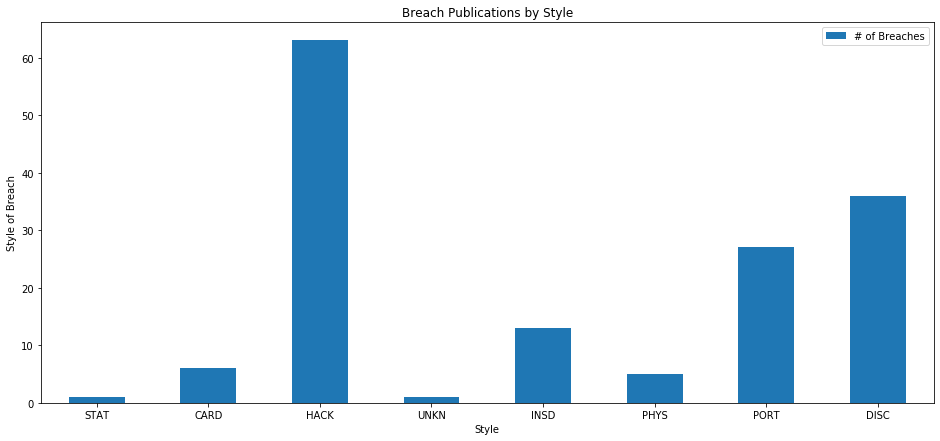

In [566]:
# Change the output image size
plt.rcParams['figure.figsize'] = [16, 7]
# Generate our bar graph
ax = breaches_by_style.plot.bar(x='Style', y='# of Breaches', rot=0)
plt.ylabel('# of Breaches')
plt.ylabel('Style of Breach')
plt.title('Breach Publications by Style')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-by-style.png', bbox_inches='tight', dpi=300)

Day before versus Day of Announcment % Change

In [567]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date
    
def get_day_before_and_breach_day(symbol, breach_date, nasdaq_df, nyse_composite_df):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    # since we're index on dates, these should be unique, get the first (and only element)
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    nyse_breach_index = nyse_composite_df.index[nyse_composite_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])

    # get the close on breach day
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']
    nyse_on_breach_day = nyse_composite_df.iloc[nyse_breach_index]['close']
          
    # We have the index and all data is chronological therefore subtracting one gets us the day before
    price_on_before_breach_day = stock_df.iloc[stock_breach_index-1]['close']
    nasdaq_on_before_breach_day = nasdaq_df.iloc[nasdaq_breach_index-1]['close']
    nyse_on_before_breach_day = nyse_composite_df.iloc[nyse_breach_index-1]['close']
    
    stock_per_change = ((price_on_breach_day-price_on_before_breach_day)/price_on_before_breach_day)*100
    nasdaq_per_change = ((nasdaq_on_breach_day-nasdaq_on_before_breach_day)/nasdaq_on_before_breach_day)*100
    nyse_per_change = ((nyse_on_breach_day-nyse_on_before_breach_day)/nyse_on_before_breach_day)*100
    adjusted_per_change = (((price_on_breach_day)/(price_on_before_breach_day)-1)*100) - (((nasdaq_on_breach_day)/(nasdaq_on_before_breach_day)-1)*100)
    adjusted_per_change2 = (((price_on_breach_day)/(price_on_before_breach_day)-1)*100) - (((nyse_on_breach_day)/(nyse_on_before_breach_day)-1)*100)

    return [symbol, stock_per_change, nasdaq_per_change, nyse_per_change, adjusted_per_change, adjusted_per_change2]
    
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

# Get the NASDAQ data for all time
nasdaq_df, nyse_composite_df = read_nasdaq_and_nyse()
stock_stats_collection = []
# For each breach, check the market and breach data
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    # Check if it is public and we have data on it otherwise skip
    if is_public == "TRUE" and is_in_scope == "TRUE":
        stock_stats_collection.append(get_day_before_and_breach_day(symbol, pub_date, nasdaq_df, nyse_composite_df))
    else:
        continue
        
headers = ['', "Stock % Change", "NASDAQ % Change", "NYSE Comp % Change", "Adjusted % Change (NASDAQ)", "Adjusted % Change (NYSE Comp)"  ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

output_data = []
mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["NYSE Comp % Change"].mean(), df["Adjusted % Change (NASDAQ)"].mean(), df["Adjusted % Change (NYSE Comp)"].mean()]
output_data.append(mean_data)
median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["NYSE Comp % Change"].median(), df["Adjusted % Change (NASDAQ)"].median(), df["Adjusted % Change (NYSE Comp)"].median()]
output_data.append(median_data)
stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["NYSE Comp % Change"].std(), df["Adjusted % Change (NASDAQ)"].std(), df["Adjusted % Change (NYSE Comp)"].std()]
output_data.append(stddev_data)

print("% Change after One Day")
df = pd.DataFrame(output_data, columns=headers)
print(df)





% Change after One Day
           Stock % Change  NASDAQ % Change  NYSE Comp % Change  \
0    Mean       -0.012930         0.068654            0.011518   
1  Median        0.156641         0.007077            0.000492   
2  StdDev        2.094397         1.128576            0.947250   

   Adjusted % Change (NASDAQ)  Adjusted % Change (NYSE Comp)  
0                   -0.081584                      -0.024448  
1                    0.041188                       0.039873  
2                    1.818132                       2.269093  


Day of Breach Versus Various Future Times

In [568]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_day_of_and_time_after(symbol, breach_date, nasdaq_df, time):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']

    # if either the NASDAQ or the stock don't have information for the future date
    # we need to return and ignore that stock.
    if stock_breach_index+time > len(stock_df):
        return False
    if nasdaq_breach_index+time > len(nasdaq_df):
        return False
    price_week_after_breach_day = stock_df.iloc[stock_breach_index+time]['close']
    nasdaq_week_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+time]['close']
    
    stock_per_change = ((price_week_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
    nasdaq_per_change = ((nasdaq_week_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
    adjusted_per_change = (((price_week_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_week_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, stock_per_change, nasdaq_per_change, adjusted_per_change]
    
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df


nasdaq_df, _ = read_nasdaq_and_nyse()
# we want to look at, 5 market days up to 520 market days (2 years)
times = [5, 10, 30, 260, 520]

for end_date in times:
    stock_stats_collection = []
    invalid_stocks = []
    # reset the CSV reader on each run through
    csv_headers, csv_reader = get_csv_file("dataset.csv")
    for breach in csv_reader:
        symbol = breach[symbol_index]
        pub_date = breach[pub_index]
        is_public = breach[public_index]
        is_in_scope = breach[in_scope_index]

        # Check if it is in scope otherwise skip
        if is_in_scope == "TRUE":
            output_stock_stats = get_day_of_and_time_after(symbol, pub_date, nasdaq_df, end_date)
            # If the requested time was beyond the end of the time frame, then we return false
            if output_stock_stats == False:
                invalid_stocks.append(symbol)
                continue
            stock_stats_collection.append(output_stock_stats)
        else:
            continue
    headers = ['', "Stock % Change", "NASDAQ % Change", "Adjusted % Change" ]
    df = pd.DataFrame(stock_stats_collection, columns=headers)

    output_data = []
    mean_data = ['Mean', df["Stock % Change"].mean(), df["NASDAQ % Change"].mean(), df["Adjusted % Change"].mean()]
    output_data.append(mean_data)
    median_data = ['Median', df["Stock % Change"].median(), df["NASDAQ % Change"].median(), df["Adjusted % Change"].median()]
    output_data.append(median_data)
    stddev_data = ['StdDev', df["Stock % Change"].std(), df["NASDAQ % Change"].std(), df["Adjusted % Change"].std()]
    output_data.append(stddev_data)

    print(f"% Change after market {end_date} days")
    df_one_week = pd.DataFrame(output_data, columns=headers)
    print(df_one_week)
    if invalid_stocks:
        print(f"The following could not included: {', '.join(invalid_stocks)}")
    print()

% Change after market 5 days
           Stock % Change  NASDAQ % Change  Adjusted % Change
0    Mean       -0.502019         0.178554          -0.680573
1  Median        0.185307         0.594051          -0.181819
2  StdDev        5.429986         2.393717           5.166610

% Change after market 10 days
           Stock % Change  NASDAQ % Change  Adjusted % Change
0    Mean       -0.175314         0.422835          -0.598149
1  Median        0.455717         0.617879          -0.296632
2  StdDev        6.185638         3.380204           5.697737

% Change after market 30 days
           Stock % Change  NASDAQ % Change  Adjusted % Change
0    Mean        0.194969         1.066341          -0.871373
1  Median       -0.217125         2.286586          -2.044814
2  StdDev       11.518294         5.639335           9.258262

% Change after market 260 days
           Stock % Change  NASDAQ % Change  Adjusted % Change
0    Mean       13.816007        13.960345          -0.144338
1  Median

Adjusted Market Price of All Breaches over Time

In [569]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_day_of_and_time_after(symbol, breach_date, nasdaq_df, time):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']

    # if either the NASDAQ or the stock don't have information for the future date
    # we need to return and ignore that stock.
    if stock_breach_index+time >= len(stock_df):
        return False
    if nasdaq_breach_index+time >= len(nasdaq_df):
        return False
    price_time_after_breach_day = stock_df.iloc[stock_breach_index+time]['close']
    nasdaq_time_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+time]['close']
    
    adjusted_per_change = (((price_time_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_time_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, adjusted_per_change]
    
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

market_days = []
adjusted_means = []
adjusted_stdd = []
nasdaq_df, _ = read_nasdaq_and_nyse()
csv_list = list(csv_reader)
# we want to look at, 5 market days up to 520 market days (2 years)
start_market_days = 1
end_market_days = 520
for end_date in range(start_market_days, end_market_days):
    stock_stats_collection = []
    invalid_stocks = []
    for breach in csv_list:
        symbol = breach[symbol_index]
        pub_date = breach[pub_index]
        is_public = breach[public_index]
        is_in_scope = breach[in_scope_index]
        # Check if it is in scope otherwise skip
        if is_in_scope == "TRUE":
            output_stock_stats = get_day_of_and_time_after(symbol, pub_date, nasdaq_df, end_date)
            # If the requested time was beyond the end of the time frame, then we return false
            if output_stock_stats == False:
                invalid_stocks.append(symbol)
                continue
            stock_stats_collection.append(output_stock_stats)
        else:
            continue
            
    headers = ['', "Adjusted % Change" ]
    df = pd.DataFrame(stock_stats_collection, columns=headers)
    # Add the Market Days since breach to an array (x axis)
    market_days.append(end_date)
    # Add a mean for each market day since breach
    adjusted_means.append(df["Adjusted % Change"].mean())
    # Add a stddev for each market day since breach
    adjusted_stdd.append(df["Adjusted % Change"].std())
    if end_date%10 == 0:
        print(f"Processed {end_date} market days")
print("Finished processing")

Processed 10 market days
Processed 20 market days
Processed 30 market days
Processed 40 market days
Processed 50 market days
Processed 60 market days
Processed 70 market days
Processed 80 market days
Processed 90 market days
Processed 100 market days
Processed 110 market days
Processed 120 market days
Processed 130 market days
Processed 140 market days
Processed 150 market days
Processed 160 market days
Processed 170 market days
Processed 180 market days
Processed 190 market days
Processed 200 market days
Processed 210 market days
Processed 220 market days
Processed 230 market days
Processed 240 market days
Processed 250 market days
Processed 260 market days
Processed 270 market days
Processed 280 market days
Processed 290 market days
Processed 300 market days
Processed 310 market days
Processed 320 market days
Processed 330 market days
Processed 340 market days
Processed 350 market days
Processed 360 market days
Processed 370 market days
Processed 380 market days
Processed 390 market 

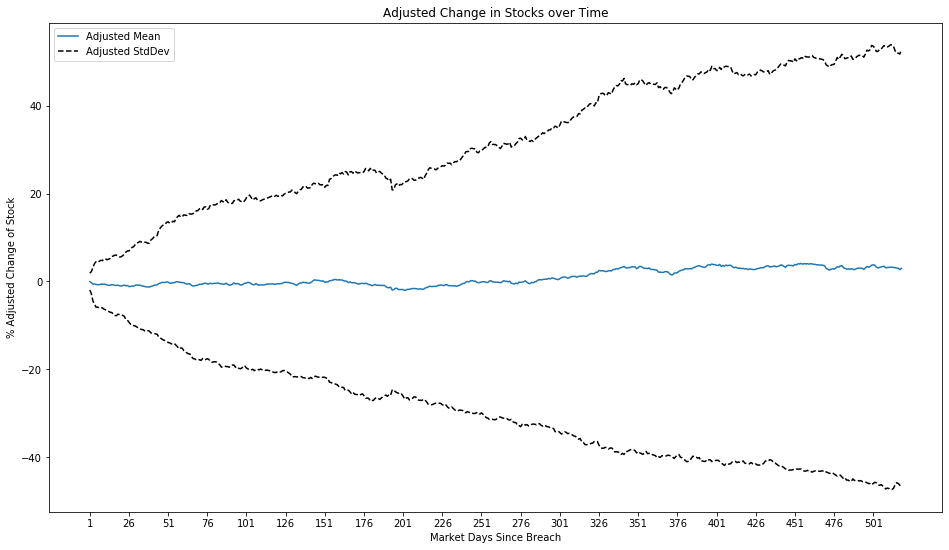

In [570]:
stdd_upper = []
stdd_lower = []

x_values = market_days
means = adjusted_means

for index, mean in enumerate(adjusted_means):
    stdd_upper.append(mean+adjusted_stdd[index])
    stdd_lower.append(mean-adjusted_stdd[index])

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.plot(x_values, means, label='Adjusted Mean')
ax1.plot(x_values, stdd_lower, label='Adjusted StdDev', color='black', linestyle="--")
ax1.plot(x_values, stdd_upper, color='black', linestyle="--")

# skip every 5 elements
plt.xticks(x_values[::25])
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Market Days Since Breach')
plt.ylabel('% Adjusted Change of Stock')
plt.title('Adjusted Change in Stocks over Time')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper left')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/public-breaches-adjusted-over-time.png', bbox_inches='tight', dpi=300)

% of Stocks that Overperformed the Market

In [571]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_data_over_time(symbol, breach_date, nasdaq_df):
    time_limit = [5, 10, 30, 260, 520]
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']
    
    current_stock_data = [symbol]
    
    # Some of these data points don't exist
    for end_date in time_limit:
        # if either the NASDAQ or the stock don't have information for the future date
        # we need to return and ignore that stock.
        if stock_breach_index+end_date >= len(stock_df):
            current_stock_data.append(np.nan)
            continue
        if nasdaq_breach_index+end_date >= len(nasdaq_df):
            current_stock_data.append(np.nan)
            continue
        price_time_after_breach_day = stock_df.iloc[stock_breach_index+end_date]['close']
        nasdaq_time_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+end_date]['close']
        spc_time = ((price_time_after_breach_day-price_on_breach_day)/price_on_breach_day)*100
        npc_time = ((nasdaq_time_after_breach_day-nasdaq_on_breach_day)/nasdaq_on_breach_day)*100
        overperform = (spc_time > npc_time)
        current_stock_data.append(overperform)
    return current_stock_data
   
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

nasdaq_df, nyse_composite_df = read_nasdaq_and_nyse()
stock_stats_collection = []
for breach in csv_reader:
    symbol = breach[symbol_index]
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    # Check if it is public and we have data on it otherwise skip
    if is_in_scope == "TRUE":
        stock_stats_collection.append(get_data_over_time(symbol, pub_date, nasdaq_df))
    else:
        continue
        
headers = ['Symbol', "One Week", "Two Weeks", "One Month", "One Year", "Two Years" ]
df = pd.DataFrame(stock_stats_collection, columns=headers)

print(df)

    Symbol  One Week  Two Weeks  One Month One Year Two Years
0     ADBE     False       True       True     True      True
1     ADBE     False       True       True     True      True
2      AET     False      False      False    False      True
3      AET      True      False      False     True      True
4      AET     False       True      False      NaN       NaN
..     ...       ...        ...        ...      ...       ...
147    UAA      True       True       True     True       NaN
148    UPS     False      False       True    False     False
149     VZ      True      False      False    False     False
150    VOD      True       True       True    False     False
151    GHC      True       True      False    False      True

[152 rows x 6 columns]


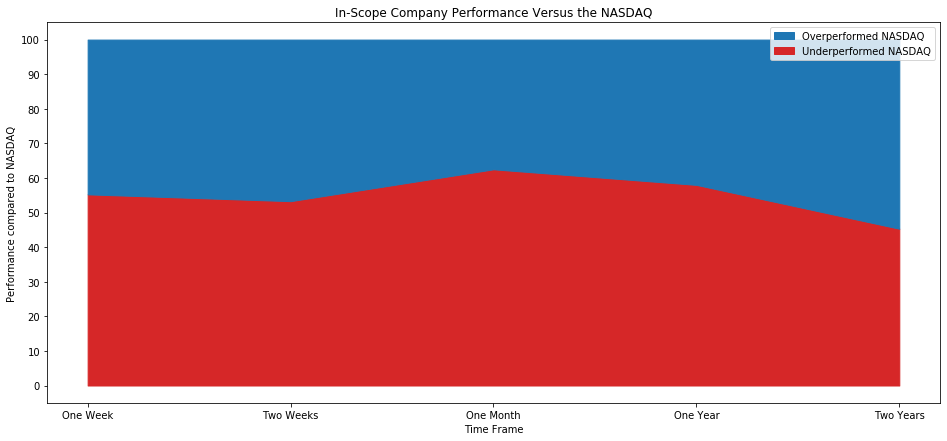

In [572]:
timeframes = ["One Week", "Two Weeks", "One Month", "One Year", "Two Years"]
number_of_rows = df.shape[0]
underperformance_rates = []
for timeframe in timeframes:
    nans = df[timeframe].isna().sum()
    overperformed = np.count_nonzero(df[timeframe])
    underperformed = (number_of_rows - overperformed - nans)
    perc_underperformed = (underperformed/(overperformed + underperformed)) * 100
    underperformance_rates.append(perc_underperformed)
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(111)
underperform_fill = ax1.fill_between(timeframes, underperformance_rates, color='C3')
overperform_fill = ax1.fill_between(timeframes, underperformance_rates, 100, color='C0')
ax1.yaxis.set_ticks(np.arange(0, 101, 10))

plt.ylabel('Performance compared to NASDAQ')
plt.xlabel('Time Frame')
plt.title('In-Scope Company Performance Versus the NASDAQ')


handles, labels = ax1.get_legend_handles_labels()
ax1.legend([overperform_fill, underperform_fill], ['Overperformed NASDAQ', 'Underperformed NASDAQ'])

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/breach-performance-versus-nasdaq', bbox_inches='tight', dpi=300)

Generate Scatter Plot for 2 years of Adjusted Market Values

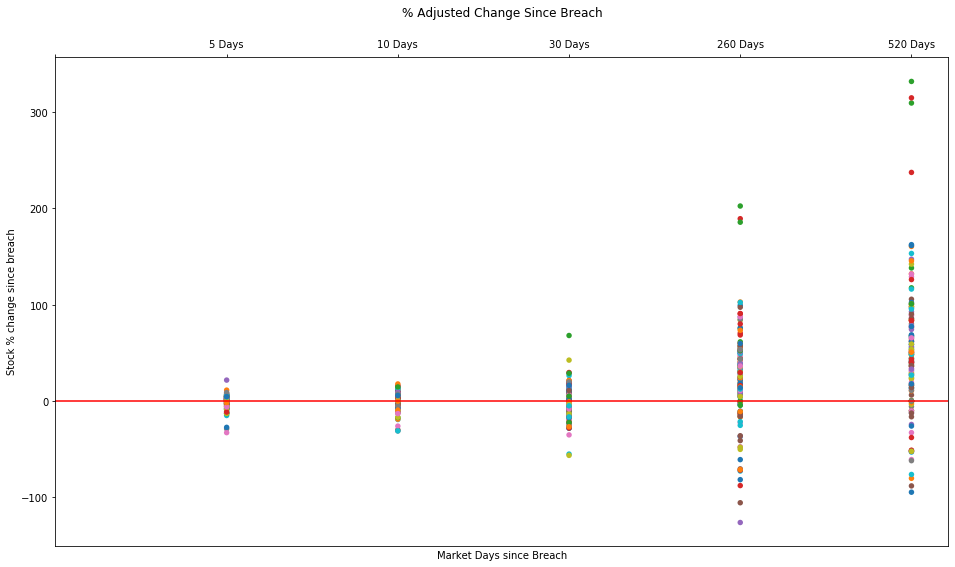

In [616]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_data_over_time(symbol, breach_date, nasdaq_df):
    time_limit = [5, 10, 30, 260, 520]
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    # get the close on breach day
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']
    

    current_stock_data = []
    
    # Some of these data points don't exist
    for end_date in time_limit:
        # if either the NASDAQ or the stock don't have information for the future date
        # we need to return and ignore that stock.
        if stock_breach_index+end_date >= len(stock_df):
            current_stock_data.append(0)
            continue
        if nasdaq_breach_index+end_date >= len(nasdaq_df):
            current_stock_data.append(0)
            continue
        price_time_after_breach_day = stock_df.iloc[stock_breach_index+end_date]['close']
        nasdaq_time_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+end_date]['close']
        adjusted_per_change = (((price_time_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_on_breach_day)/(nasdaq_time_after_breach_day)-1)*100)
        current_stock_data.append(adjusted_per_change)
    return current_stock_data
   
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

nasdaq_df, nyse_composite_df = read_nasdaq_and_nyse()
groups = []
sets = []
for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    # Check if it is public and we have data on it otherwise skip
    if is_in_scope == "TRUE":
        symbol = breach[symbol_index]
        groups.append(symbol)
        x_values = [1, 2, 3, 4, 5]
        y_values = get_data_over_time(symbol, pub_date, nasdaq_df)
        sets.append((x_values, y_values))
    else:
        continue
  
data = tuple(sets)
# Create plot
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
plt.axhline(y=00, color='r', linestyle='-')

ax.xaxis.tick_top()
for data, group in zip(data, groups):
    x, y = data
    ax.scatter(x, y, edgecolors='none', s=30, label=group)

#plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=16, fontsize=8)

a = np.arange(6)
plt.title('% Adjusted Change Since Breach', y=1.07)
plt.ylabel('Stock % change since breach')
ax.xaxis.set_ticks(a)
plt.xlabel('Market Days since Breach')
my_xticks = ['', '5 Days','10 Days','30 Days','260 Days', '520 Days', '']
ax.xaxis.set_ticklabels(my_xticks)

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/scatter-change-since-breach-years', bbox_inches='tight', dpi=300)

Generate Scatter Plot for 1,2,4,8,16 Adjusted Market Values

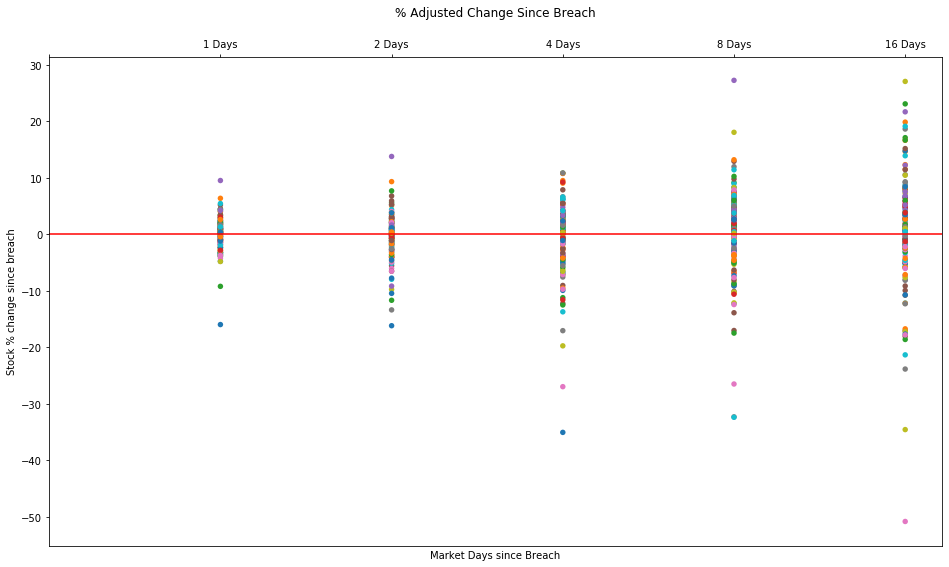

In [615]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_data_over_time(symbol, breach_date, nasdaq_df):
    time_limit = [1, 2, 4, 8, 16]
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    # get the close on breach day
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']
    

    current_stock_data = []
    
    # Some of these data points don't exist
    for end_date in time_limit:
        # if either the NASDAQ or the stock don't have information for the future date
        # we need to return and ignore that stock.
        if stock_breach_index+end_date >= len(stock_df):
            current_stock_data.append(0)
            continue
        if nasdaq_breach_index+end_date >= len(nasdaq_df):
            current_stock_data.append(0)
            continue
        price_time_after_breach_day = stock_df.iloc[stock_breach_index+end_date]['close']
        nasdaq_time_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+end_date]['close']
        adjusted_per_change = (((price_time_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_on_breach_day)/(nasdaq_time_after_breach_day)-1)*100)
        current_stock_data.append(adjusted_per_change)
    return current_stock_data
   
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

nasdaq_df, nyse_composite_df = read_nasdaq_and_nyse()
groups = []
sets = []
for breach in csv_reader:
    pub_date = breach[pub_index]
    is_public = breach[public_index]
    is_in_scope = breach[in_scope_index]
    # Check if it is public and we have data on it otherwise skip
    if is_in_scope == "TRUE":
        symbol = breach[symbol_index]
        groups.append(symbol)
        x_values = [1, 2, 3, 4, 5]
        y_values = get_data_over_time(symbol, pub_date, nasdaq_df)
        sets.append((x_values, y_values))
    else:
        continue
  
data = tuple(sets)
# Create plot
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
plt.axhline(y=00, color='r', linestyle='-')

ax.xaxis.tick_top()
for data, group in zip(data, groups):
    x, y = data
    ax.scatter(x, y, edgecolors='none', s=30, label=group)

#plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=16, fontsize=8)

a = np.arange(6)
plt.title('% Adjusted Change Since Breach', y=1.07)
plt.ylabel('Stock % change since breach')
ax.xaxis.set_ticks(a)
plt.xlabel('Market Days since Breach')
my_xticks = ['', '1 Days','2 Days','4 Days','8 Days', '16 Days', '']
ax.xaxis.set_ticklabels(my_xticks)

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/scatter-change-since-breach-days', bbox_inches='tight', dpi=300)

Stocks Market Adjusted Data By Size of Breach > 1 mill, first 30 days

In [609]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_day_of_and_time_after(symbol, breach_date, nasdaq_df, time):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']

    # if either the NASDAQ or the stock don't have information for the future date
    # we need to return and ignore that stock.
    if stock_breach_index+time >= len(stock_df):
        return False
    if nasdaq_breach_index+time >= len(nasdaq_df):
        return False
    price_time_after_breach_day = stock_df.iloc[stock_breach_index+time]['close']
    nasdaq_time_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+time]['close']
    
    adjusted_per_change = (((price_time_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_time_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, adjusted_per_change]
    
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

market_days = []
adjusted_means = []
adjusted_stdd = []
nasdaq_df, _ = read_nasdaq_and_nyse()
csv_list = list(csv_reader)
# we want to look at, 5 market days up to 520 market days (2 years)
start_market_days = 1
end_market_days = 15
for end_date in range(start_market_days, end_market_days):
    stock_stats_collection = []
    invalid_stocks = []
    for breach in csv_list:
        symbol = breach[symbol_index]
        pub_date = breach[pub_index]
        is_public = breach[public_index]
        is_in_scope = breach[in_scope_index]
        size = breach[size_index]
        try:
            size = int(size.replace(',', ''))
        except ValueError:
            # we're not able to convert
            continue

        # Check if it is in scope and the size is right, otherwise skip
        if is_in_scope == "TRUE" and size >= 1000000:
            output_stock_stats = get_day_of_and_time_after(symbol, pub_date, nasdaq_df, end_date)
            # If the requested time was beyond the end of the time frame, then we return false
            if output_stock_stats == False:
                invalid_stocks.append(symbol)
                continue
            stock_stats_collection.append(output_stock_stats)
        else:
            continue
            
    headers = ['', "Adjusted % Change" ]
    df = pd.DataFrame(stock_stats_collection, columns=headers)
    # Add the Market Days since breach to an array (x axis)
    market_days.append(end_date)
    # Add a mean for each market day since breach
    adjusted_means.append(df["Adjusted % Change"].mean())
    # Add a stddev for each market day since breach
    adjusted_stdd.append(df["Adjusted % Change"].std())
    if end_date%10 == 0:
        print(f"Processed {end_date} market days")
print("Finished processing")

Processed 10 market days
Finished processing


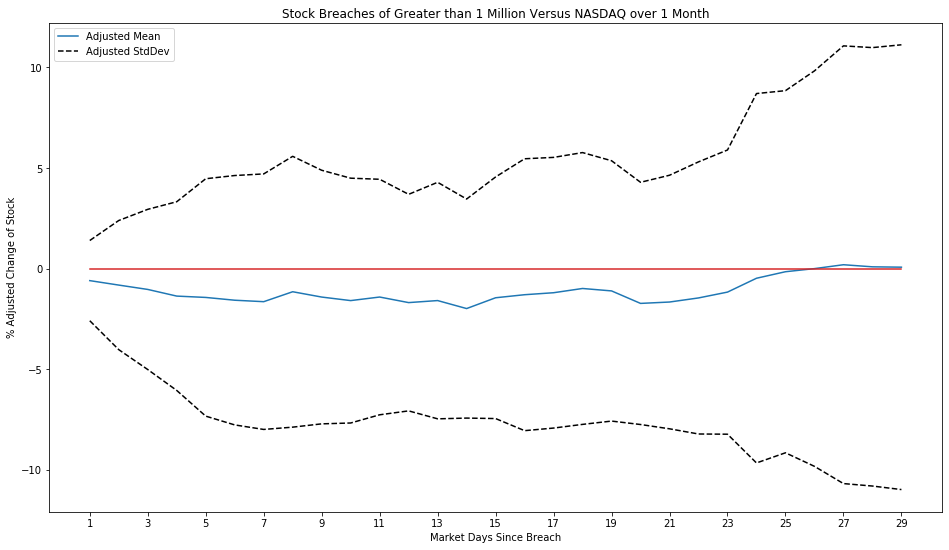

In [593]:
stdd_upper = []
stdd_lower = []

x_values = market_days
means = adjusted_means

for index, mean in enumerate(adjusted_means):
    stdd_upper.append(mean+adjusted_stdd[index])
    stdd_lower.append(mean-adjusted_stdd[index])

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.plot(x_values, means, label='Adjusted Mean')
ax1.plot(x_values, [0] * len(x_values), label='', color='C3')
ax1.plot(x_values, stdd_lower, label='Adjusted StdDev', color='black', linestyle="--")
ax1.plot(x_values, stdd_upper, color='black', linestyle="--")

# skip every 5 elements
plt.xticks(x_values[::2])
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Market Days Since Breach')
plt.ylabel('% Adjusted Change of Stock')
plt.title('Stock Breaches of Greater than 1 Million Versus NASDAQ over 1 Month')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper left')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/breaches-over-1-mill-records-over-month', bbox_inches='tight', dpi=300)

Stocks Market Adjusted Data By Size of Breach > 100 mill, first 30 days

In [612]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")
employee_count_index = csv_headers.index("Employee Count")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_day_of_and_time_after(symbol, breach_date, nasdaq_df, time):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']

    # if either the NASDAQ or the stock don't have information for the future date
    # we need to return and ignore that stock.
    if stock_breach_index+time >= len(stock_df):
        return False
    if nasdaq_breach_index+time >= len(nasdaq_df):
        return False
    price_time_after_breach_day = stock_df.iloc[stock_breach_index+time]['close']
    nasdaq_time_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+time]['close']
    
    adjusted_per_change = (((price_time_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_time_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, adjusted_per_change]
    
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

market_days = []
adjusted_means = []
adjusted_stdd = []
nasdaq_df, _ = read_nasdaq_and_nyse()
csv_list = list(csv_reader)
# we want to look at, 5 market days up to 520 market days (2 years)
start_market_days = 1
end_market_days = 30
for end_date in range(start_market_days, end_market_days):
    stock_stats_collection = []
    invalid_stocks = []
    for breach in csv_list:
        symbol = breach[symbol_index]
        pub_date = breach[pub_index]
        is_public = breach[public_index]
        is_in_scope = breach[in_scope_index]
        size = breach[size_index]
        employee_count = breach[employee_count_index]
        size = breach[size_index]
        
        try:
            size = int(size.replace(',', ''))
        except ValueError:
            # we're not able to convert
            continue

        # Check if it is in scope and the size is right, otherwise skip
        if is_in_scope == "TRUE" and size >= 100000000:
            output_stock_stats = get_day_of_and_time_after(symbol, pub_date, nasdaq_df, end_date)
            # If the requested time was beyond the end of the time frame, then we return false
            if output_stock_stats == False:
                invalid_stocks.append(symbol)
                continue
            stock_stats_collection.append(output_stock_stats)
        else:
            continue
    headers = ['', "Adjusted % Change" ]
    df = pd.DataFrame(stock_stats_collection, columns=headers)
    # Add the Market Days since breach to an array (x axis)
    market_days.append(end_date)
    # Add a mean for each market day since breach
    adjusted_means.append(df["Adjusted % Change"].mean())
    # Add a stddev for each market day since breach
    adjusted_stdd.append(df["Adjusted % Change"].std())
    if end_date%10 == 0:
        print(f"Processed {end_date} market days")
print("Finished processing")

Processed 10 market days
Processed 20 market days
Finished processing


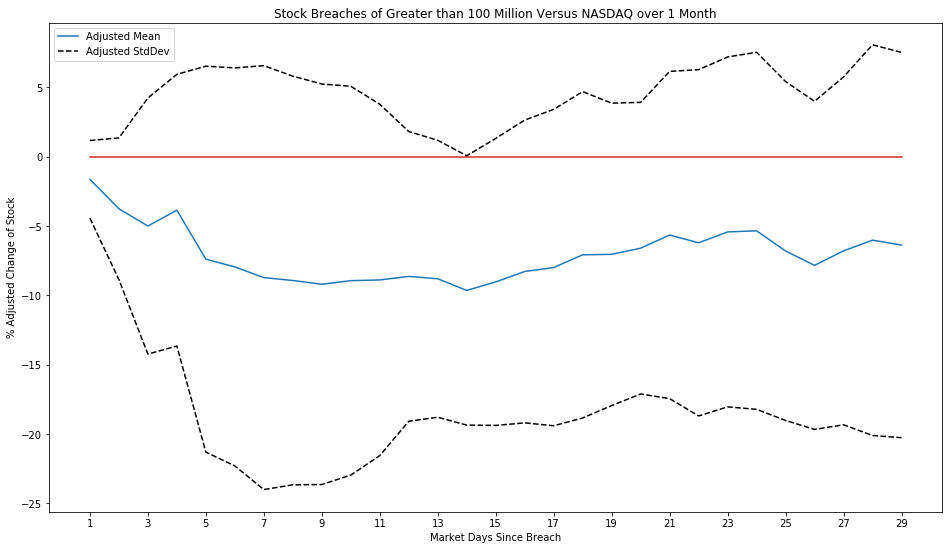

In [613]:
stdd_upper = []
stdd_lower = []

x_values = market_days
means = adjusted_means

for index, mean in enumerate(adjusted_means):
    stdd_upper.append(mean+adjusted_stdd[index])
    stdd_lower.append(mean-adjusted_stdd[index])

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.plot(x_values, means, label='Adjusted Mean')
ax1.plot(x_values, [0] * len(x_values), label='', color='C3')
ax1.plot(x_values, stdd_lower, label='Adjusted StdDev', color='black', linestyle="--")
ax1.plot(x_values, stdd_upper, color='black', linestyle="--")

# skip every 5 elements
plt.xticks(x_values[::2])
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Market Days Since Breach')
plt.ylabel('% Adjusted Change of Stock')
plt.title('Stock Breaches of Greater than 100 Million Versus NASDAQ over 1 Month')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper left')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/breaches-over-100-mill-records-over-month', bbox_inches='tight', dpi=300)

Mean Adjusted Market Value for Firms over 100,000 people over first Month

In [595]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")
employee_count_index = csv_headers.index("Employee Count")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_day_of_and_time_after(symbol, breach_date, nasdaq_df, time):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']

    # if either the NASDAQ or the stock don't have information for the future date
    # we need to return and ignore that stock.
    if stock_breach_index+time >= len(stock_df):
        return False
    if nasdaq_breach_index+time >= len(nasdaq_df):
        return False
    price_time_after_breach_day = stock_df.iloc[stock_breach_index+time]['close']
    nasdaq_time_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+time]['close']
    
    adjusted_per_change = (((price_time_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_time_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, adjusted_per_change]
    
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

market_days = []
adjusted_means = []
adjusted_stdd = []
nasdaq_df, _ = read_nasdaq_and_nyse()
csv_list = list(csv_reader)
# we want to look at, 5 market days up to 520 market days (2 years)
start_market_days = 1
end_market_days = 30
count = 0
for end_date in range(start_market_days, end_market_days):
    stock_stats_collection = []
    invalid_stocks = []
    for breach in csv_list:
        symbol = breach[symbol_index]
        pub_date = breach[pub_index]
        is_public = breach[public_index]
        is_in_scope = breach[in_scope_index]
        size = breach[size_index]
        employee_count = breach[employee_count_index]
        
        # Check if it is in scope and the size is right, otherwise skip
        if is_in_scope == "TRUE" and employee_count == "Over 100000":
            count += 1
            output_stock_stats = get_day_of_and_time_after(symbol, pub_date, nasdaq_df, end_date)
            # If the requested time was beyond the end of the time frame, then we return false
            if output_stock_stats == False:
                invalid_stocks.append(symbol)
                continue
            stock_stats_collection.append(output_stock_stats)
        else:
            continue
    headers = ['', "Adjusted % Change" ]
    df = pd.DataFrame(stock_stats_collection, columns=headers)
    # Add the Market Days since breach to an array (x axis)
    market_days.append(end_date)
    # Add a mean for each market day since breach
    adjusted_means.append(df["Adjusted % Change"].mean())
    # Add a stddev for each market day since breach
    adjusted_stdd.append(df["Adjusted % Change"].std())
    if end_date%10 == 0:
        print(f"Processed {end_date} market days")
print("Finished processing")

Processed 10 market days
Processed 20 market days
Finished processing


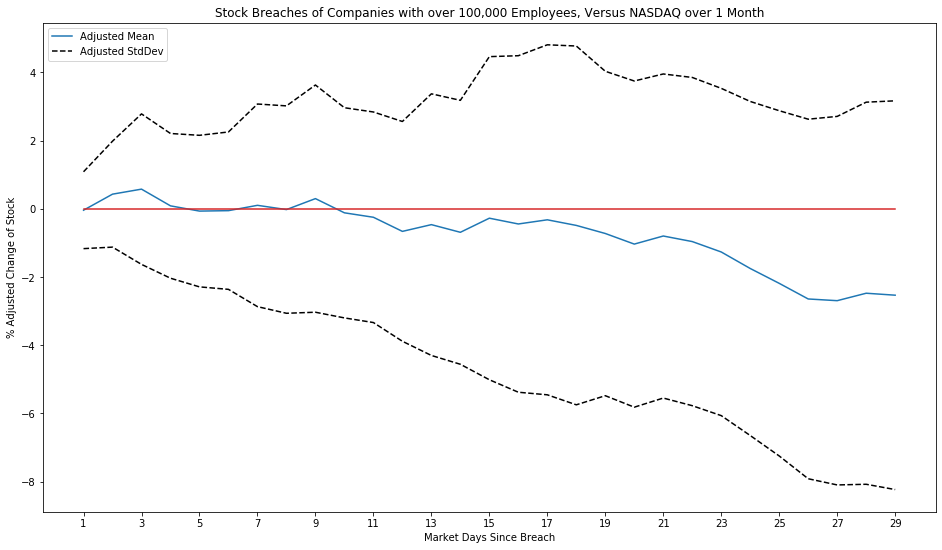

In [596]:
stdd_upper = []
stdd_lower = []

x_values = market_days
means = adjusted_means

for index, mean in enumerate(adjusted_means):
    stdd_upper.append(mean+adjusted_stdd[index])
    stdd_lower.append(mean-adjusted_stdd[index])

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.plot(x_values, means, label='Adjusted Mean')
ax1.plot(x_values, [0] * len(x_values), label='', color='C3')
ax1.plot(x_values, stdd_lower, label='Adjusted StdDev', color='black', linestyle="--")
ax1.plot(x_values, stdd_upper, color='black', linestyle="--")

# skip every 5 elements
plt.xticks(x_values[::2])
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Market Days Since Breach')
plt.ylabel('% Adjusted Change of Stock')
plt.title('Stock Breaches of Companies with over 100,000 Employees, Versus NASDAQ over 1 Month')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper left')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/breaches-over-100000-employees-over-month', bbox_inches='tight', dpi=300)

Mean Adjusted Market Value for Firms over 100,000 people over first Month

In [597]:
csv_headers, csv_reader = get_csv_file("dataset.csv")
symbol_index = csv_headers.index("Symbol")
pub_index = csv_headers.index("Publication")
public_index = csv_headers.index("Was_Public")
in_scope_index = csv_headers.index("In_Scope")
employee_count_index = csv_headers.index("Employee Count")

def fix_weekend_date(breachday):
    # Set to monday if we're on Sat
    if breachday.weekday() == 5:
        breachday = breachday + datetime.timedelta(days=2)
    # Set to monday if we're on Sunday
    if breachday.weekday() == 6:
        breachday = breachday + datetime.timedelta(days=1)
    return breachday
    #return breachday.strftime("%Y-%m-%d")
    
def fix_closed_market_data(adjusted_breach_date):
    adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
    # The market may have been closed for whatever reason on our breach date so lets check
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    while nasdaq_breach_index == []:
        # Keep adding one day each time till we get to the next trading day
        adjusted_breach_date = adjusted_breach_date + datetime.timedelta(days=1)
        # we're gonna need the right format here to search our dataframe
        adjusted_breach_date_str = adjusted_breach_date.strftime("%Y-%m-%d")
        # give us the index where the date equals the adjusted_breach_date
        nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date_str].tolist()
    return adjusted_breach_date

def get_day_of_and_time_after(symbol, breach_date, nasdaq_df, time):
    # Import our stock data
    full_path = "data/"+ symbol + "-daydata.csv"
    stock_df = pd.read_csv(full_path)
    # Fix the date if it falls on a weekend
    breachday = datetime.datetime.strptime(breach_date, "%m/%d/%y")
    # We want the closing on the day before the breach
    breachday = breachday - datetime.timedelta(days=1)
    adjusted_breach_date = fix_weekend_date(breachday)
    adjusted_breach_date = fix_closed_market_data(adjusted_breach_date)
    # convert the datetime to a string, we no longer need the datetime fmt
    adjusted_breach_date = adjusted_breach_date.strftime("%Y-%m-%d")
    
    
    nasdaq_breach_index = nasdaq_df.index[nasdaq_df['date'] == adjusted_breach_date].tolist()[0]
    stock_breach_index = (stock_df.index[stock_df['date'] == adjusted_breach_date].tolist()[0])
    
    price_on_breach_day = stock_df.iloc[stock_breach_index]['close']
    nasdaq_on_breach_day = nasdaq_df.iloc[nasdaq_breach_index]['close']

    # if either the NASDAQ or the stock don't have information for the future date
    # we need to return and ignore that stock.
    if stock_breach_index+time >= len(stock_df):
        return False
    if nasdaq_breach_index+time >= len(nasdaq_df):
        return False
    price_time_after_breach_day = stock_df.iloc[stock_breach_index+time]['close']
    nasdaq_time_after_breach_day = nasdaq_df.iloc[nasdaq_breach_index+time]['close']
    
    adjusted_per_change = (((price_time_after_breach_day)/(price_on_breach_day)-1)*100) - (((nasdaq_time_after_breach_day)/(nasdaq_on_breach_day)-1)*100)
    
    return [symbol, adjusted_per_change]
    
def read_nasdaq_and_nyse():
    base_path = "data/^IXIC-daydata.csv"
    nasdaq_df = pd.read_csv(base_path)
    base_path = "data/^NYA-daydata.csv"
    nyse_composite_df = pd.read_csv(base_path)
    return nasdaq_df, nyse_composite_df

market_days = []
adjusted_means = []
adjusted_stdd = []
nasdaq_df, _ = read_nasdaq_and_nyse()
csv_list = list(csv_reader)
# we want to look at, 5 market days up to 520 market days (2 years)
start_market_days = 1
end_market_days = 30
count = 0
for end_date in range(start_market_days, end_market_days):
    stock_stats_collection = []
    invalid_stocks = []
    for breach in csv_list:
        symbol = breach[symbol_index]
        pub_date = breach[pub_index]
        is_public = breach[public_index]
        is_in_scope = breach[in_scope_index]
        size = breach[size_index]
        employee_count = breach[employee_count_index]
        
        # Check if it is in scope and the size is right, otherwise skip
        if is_in_scope == "TRUE" and (employee_count == "1001 to 10000" or employee_count =="101 to 1000"):
            count += 1
            output_stock_stats = get_day_of_and_time_after(symbol, pub_date, nasdaq_df, end_date)
            # If the requested time was beyond the end of the time frame, then we return false
            if output_stock_stats == False:
                invalid_stocks.append(symbol)
                continue
            stock_stats_collection.append(output_stock_stats)
        else:
            continue
    headers = ['', "Adjusted % Change" ]
    df = pd.DataFrame(stock_stats_collection, columns=headers)
    # Add the Market Days since breach to an array (x axis)
    market_days.append(end_date)
    # Add a mean for each market day since breach
    adjusted_means.append(df["Adjusted % Change"].mean())
    # Add a stddev for each market day since breach
    adjusted_stdd.append(df["Adjusted % Change"].std())
    if end_date%10 == 0:
        print(f"Processed {end_date} market days")
print("Finished processing")

Processed 10 market days
Processed 20 market days
Finished processing


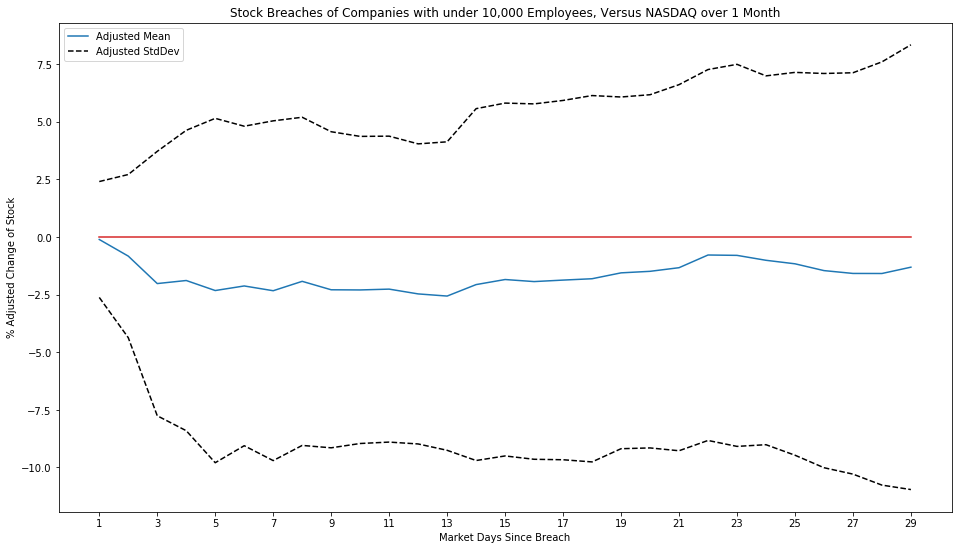

In [598]:
stdd_upper = []
stdd_lower = []

x_values = market_days
means = adjusted_means

for index, mean in enumerate(adjusted_means):
    stdd_upper.append(mean+adjusted_stdd[index])
    stdd_lower.append(mean-adjusted_stdd[index])

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.plot(x_values, means, label='Adjusted Mean')
ax1.plot(x_values, [0] * len(x_values), label='', color='C3')
ax1.plot(x_values, stdd_lower, label='Adjusted StdDev', color='black', linestyle="--")
ax1.plot(x_values, stdd_upper, color='black', linestyle="--")

# skip every 5 elements
plt.xticks(x_values[::2])
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Market Days Since Breach')
plt.ylabel('% Adjusted Change of Stock')
plt.title('Stock Breaches of Companies with under 10,000 Employees, Versus NASDAQ over 1 Month')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper left')
fig1 = plt.gcf()
plt.show()
fig1.savefig('images/breaches-under-10000-employees-over-month', bbox_inches='tight', dpi=300)